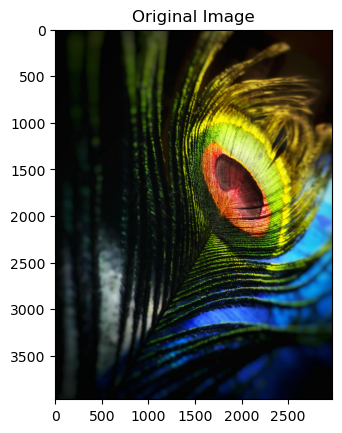

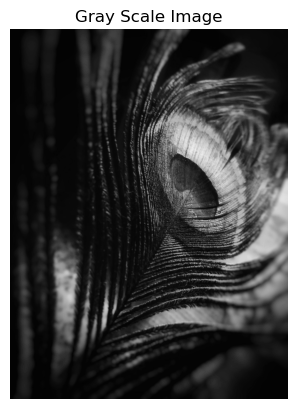

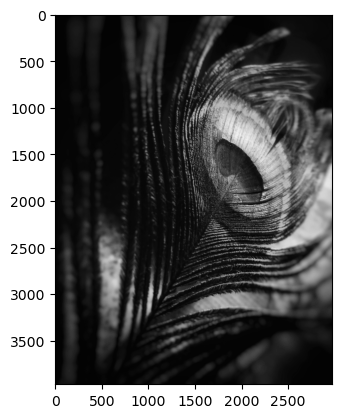

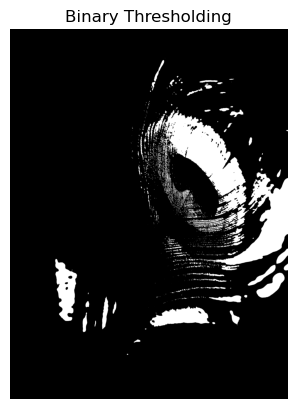

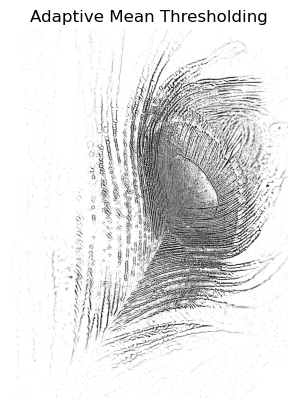

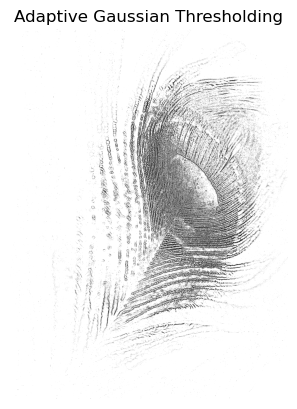

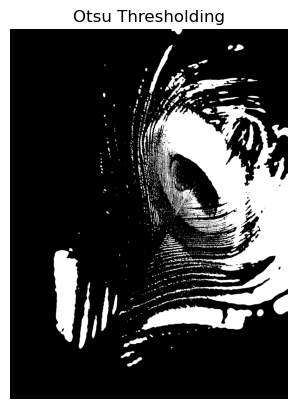

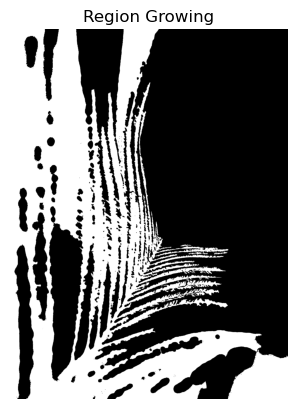

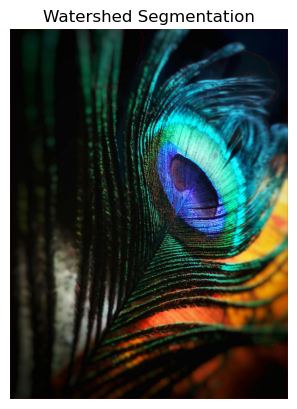

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('MainImage.jpg')
plt.imshow(image)
plt.title('Original Image')
plt.show()


gray_image = cv2.imread('MainImage.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image, cmap = 'gray')
plt.title('Gray Scale Image')
plt.axis('off')
plt.show()

gray_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image1, cmap = 'gray')
plt.show()

# Binary Thresholding
threshold_value = 127
ret, thresh_binary = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_binary, cmap='gray')
plt.title("Binary Thresholding")
plt.axis('off')
plt.show()

# Adaptive Mean Thresholding
block_size = 11
constant = 2
thresh_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, block_size, constant)

plt.imshow(thresh_mean, cmap='gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')
plt.show()

# Adaptive Gaussian Thresholding
block_size = 11
constant = 2
thresh_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, block_size, constant)

plt.imshow(thresh_gaussian, cmap='gray')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')
plt.show()

# Otsu Thresholding
ret, thresh_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis('off')
plt.show()

# Region Growing
seed_x, seed_y = 100, 100
threshold = 15

rows, cols = gray_image.shape
segmented = np.zeros_like(gray_image)
visited = set()
queue = [(seed_x, seed_y)]
visited.add((seed_x, seed_y))

while queue:
    x, y = queue.pop(0)
    if 0 <= x < rows and 0 <= y < cols:
        if abs(int(gray_image[x, y]) - int(gray_image[seed_x, seed_y])) < threshold:
            segmented[x, y] = 255
            neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
            for nx, ny in neighbors:
                if (nx, ny) not in visited and 0 <= nx < rows and 0 <= ny < cols:
                    queue.append((nx, ny))
                    visited.add((nx, ny))

plt.imshow(segmented, cmap='gray')
plt.title("Region Growing")
plt.axis('off')
plt.show()

# Watershed Segmentation
if len(image.shape) == 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = image.copy()

blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

markers = np.zeros(gray_image.shape, dtype=np.int32)
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, i + 1, -1)

# Applying the watershed algorithm
markers = cv2.watershed(image, markers)
image_color = image.copy()
image_color[markers == -1] = [0, 0, 255]

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis('off')
plt.show()